## Compute Spearman Correlation between submissions

In [1]:
import pandas as pd
from scipy.stats import spearmanr

# Load the two CSV files
file1_path = "./submission_2025-03-14_23-48_rsf.csv"
file2_path = "./submitted/submission_2025-03-08_23-44_rsf_ok.csv"
file3_path = "./submission_2025-03-12_23-11_deepsurv.csv"
file4_path = "./submission_2025-03-13_13-11_meta_learner_linear_ok.csv"

df_meta = pd.read_csv(file1_path, index_col=0)  # Assuming first column is ID
df_rsf = pd.read_csv(file2_path, index_col=0)  # Assuming first column is ID
df_deepsurv = pd.read_csv(file3_path, index_col=0)  # Assuming first column is ID
df_linear = pd.read_csv(file4_path, index_col=0)  # Assuming first column is ID

# Ensure they are aligned by index (ID)
df_merged = df_deepsurv.join(df_rsf, lsuffix='_deepsurv', rsuffix='_rsf')
df_merged = df_merged.join(df_meta, rsuffix='_meta')
df_merged = df_merged.join(df_linear, rsuffix='_linear')
print(df_merged.head())

# Compute Spearman correlation
spearman_corr1, p_value = spearmanr(df_merged['risk_score_deepsurv'], df_merged['risk_score_rsf'])
spearman_corr2, p_value = spearmanr(df_merged['risk_score_deepsurv'], df_merged['risk_score'])
spearman_corr3, p_value = spearmanr(df_merged['risk_score_rsf'], df_merged['risk_score'])

spearman_corr1


      risk_score_deepsurv  risk_score_rsf  risk_score  risk_score_linear
ID                                                                      
KYW1             0.633690      642.916408  603.723597          -0.932224
KYW2             0.152306      625.347556  575.812182          -2.428994
KYW3            -0.666794      355.776220  369.071512          -2.694589
KYW4             0.529090      690.475762  679.911632          -1.267346
KYW5             0.793665      560.101718  576.428874          -1.542712


0.8708168172517577

In [29]:
# file2_path = "./submission_2025-03-13_10-46_meta_learner.csv"
# file1_path = "./submission_2025-03-11_19-17_rsf.csv"

In [4]:
# Z normalize bothb distributions
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rsf_dist = df_rsf['risk_score'].values.reshape(-1, 1)
deepsurv_dist = df_deepsurv['risk_score'].values.reshape(-1, 1)
meta_dist = df_meta['risk_score'].values.reshape(-1, 1)
linear_dist = df_linear['risk_score'].values.reshape(-1, 1)

df_deepsurv['risk_score_z'] = scaler.fit_transform(deepsurv_dist)
df_rsf['risk_score_z'] = scaler.fit_transform(rsf_dist)
df_meta['risk_score_z'] = scaler.fit_transform(meta_dist)
df_linear['risk_score_z'] = scaler.fit_transform(linear_dist)

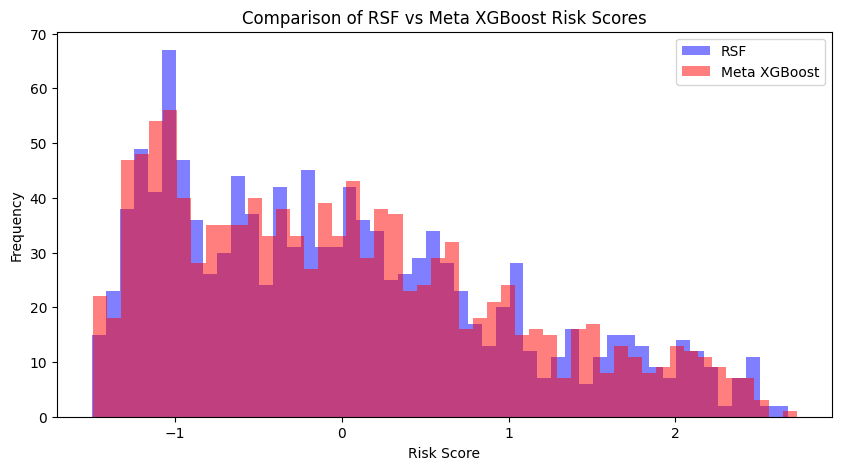

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df_rsf["risk_score_z"], bins=50, alpha=0.5, label="RSF", color="blue")
# plt.hist(df_deepsurv["risk_score_z"], bins=50, alpha=0.5, label="DeepSurv", color="green")
plt.hist(df_meta["risk_score_z"], bins=50, alpha=0.5, label="Meta XGBoost", color="red")
# plt.hist(df_linear["risk_score_z"], bins=50, alpha=0.5, label="Meta Linear", color="purple")
plt.xlabel("Risk Score")
plt.ylabel("Frequency")
plt.legend()
plt.title("Comparison of RSF vs Meta XGBoost Risk Scores")
plt.show()
